In [1]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300
import pywt
import pywt.data
import numpy as np
from math import sqrt
from PIL import Image, ImageChops, ImageOps
import pickle

# Задание 1

In [2]:
!wget https://courses.openedu.ru/assets/courseware/v1/9a395139a20d0a4b4d869db364fd42d4/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/village-5511732_1280.jpg

--2023-09-12 11:17:33--  https://courses.openedu.ru/assets/courseware/v1/9a395139a20d0a4b4d869db364fd42d4/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/village-5511732_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 416313 (407K) [image/jpeg]
Saving to: ‘village-5511732_1280.jpg’

village-5511732_128 100%[===================>] 406.56K   372KB/s    in 1.1s    

2023-09-12 11:17:36 (372 KB/s) - ‘village-5511732_1280.jpg’ saved [416313/416313]



In [18]:
image_name = 'village-5511732_1280.jpg'

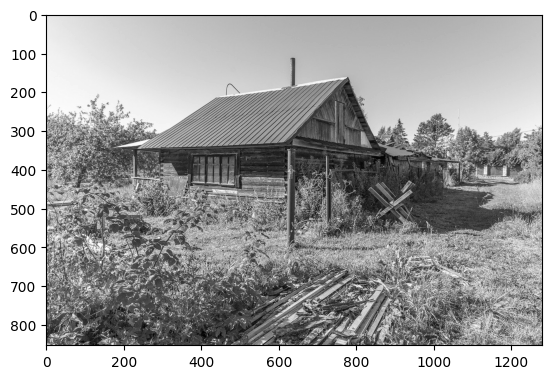

In [19]:
img = cv2.imread(image_name)
GRimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(GRimg,cmap='gray');

In [20]:
wavelet = 'haar'
c = pywt.dwt2(GRimg,wavelet)
cA, (cH, cV, cD)= c

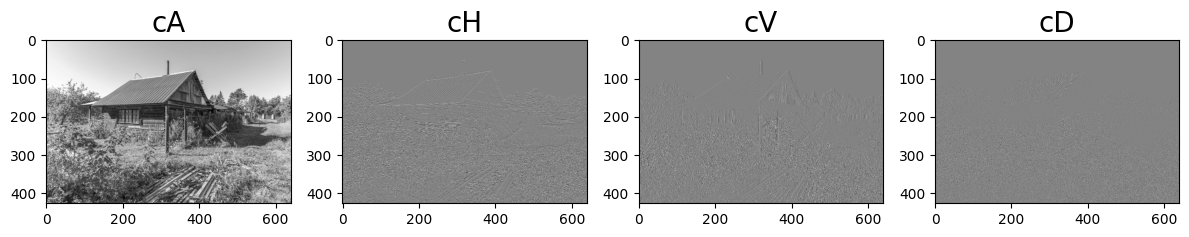

In [22]:
titles = ['cA', 'cH', 'cV', 'cD']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA, cH, cV, cD]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()

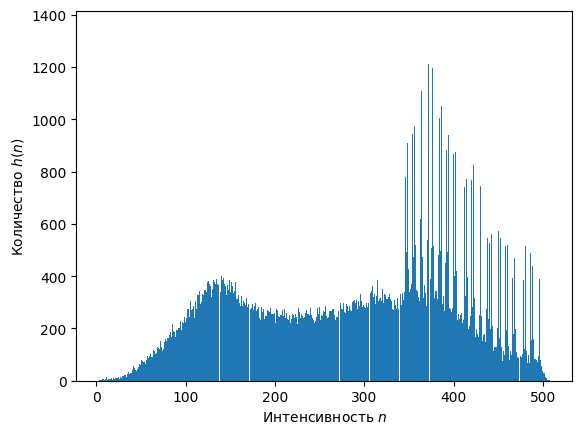

In [28]:
plt.hist(cA.ravel(), bins = 1024)
plt.xlabel('Интенсивность $n$')
plt.ylabel('Количество $h(n)$')
plt.show()

In [25]:
n, h = np.unique (cA.ravel(), return_counts= True)

In [29]:
max(h)

1227

# Задание 2

In [30]:
!wget https://courses.openedu.ru/assets/courseware/v1/6198dc195c9dd9b03fab679d4f0d2f6a/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/saint-petersbourg-1936035_1280.jpg

--2023-09-12 11:40:44--  https://courses.openedu.ru/assets/courseware/v1/6198dc195c9dd9b03fab679d4f0d2f6a/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/saint-petersbourg-1936035_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208290 (203K) [image/jpeg]
Saving to: ‘saint-petersbourg-1936035_1280.jpg’

saint-petersbourg-1 100%[===================>] 203.41K   245KB/s    in 0.8s    

2023-09-12 11:40:46 (245 KB/s) - ‘saint-petersbourg-1936035_1280.jpg’ saved [208290/208290]



In [80]:
image_name = 'saint-petersbourg-1936035_1280.jpg'

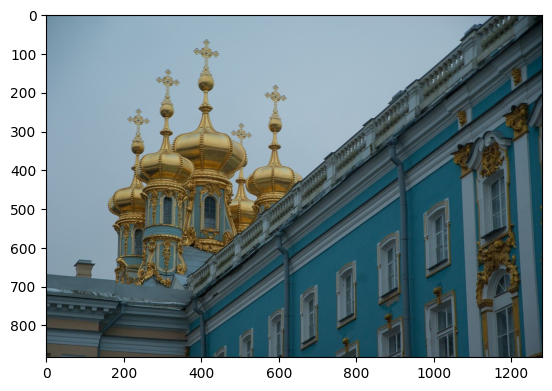

In [94]:
img = cv2.imread(image_name)
GRimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(GRimg)

In [90]:
wavelet = 'haar'
c = pywt.dwt2(GRimg[:,:, 0],wavelet)
cA, (cH, cV, cD) = c
c1 = pywt.dwt2(cA,wavelet)
cA1 = c1[0]
colvo = 0
for i in cA1.ravel():
  if (abs(i) < 110):
    colvo+=1

In [91]:
wavelet = 'haar'
c = pywt.dwt2(GRimg[:,:, 1],wavelet)
cA, (cH, cV, cD) = c
c1 = pywt.dwt2(cA,wavelet)
cA1 = c1[0]
for i in cA1.ravel():
  if (abs(i) < 110):
    colvo+=1

10675

In [92]:
wavelet = 'haar'
c = pywt.dwt2(GRimg[:,:, 2],wavelet)
cA, (cH, cV, cD) = c
c1 = pywt.dwt2(cA,wavelet)
cA1 = c1[0]
for i in cA1.ravel():
  if (abs(i) < 110):
    colvo+=1

colvo

13054

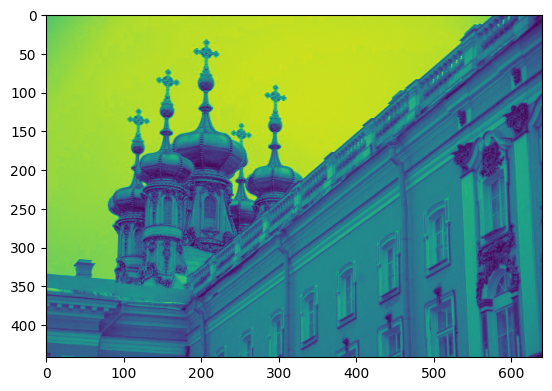

In [93]:
plt.imshow(cA)